## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:** 

* Machine Learning task: Classification model 
* Target variable: Loan_Status 
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant
* **CoapplicantIncome:** Income of the co-applicant
* **LoanAmount:** Loan amount requested
* **Loan_Amount_Term:** Term of the loan
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Status:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# for creating pipelines
from sklearn.pipeline import Pipeline

# filter warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [2]:
# Import the data from 'credit.csv'
df = pd.read_csv('loan.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# check the number of rows and observations
df.shape

(614, 13)

<Axes: >

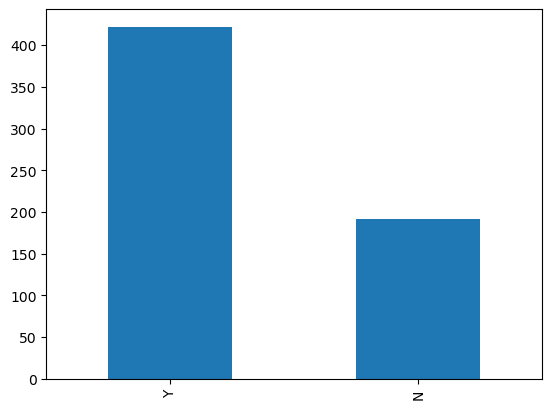

In [4]:
# How many application were approved and how many were denied?
df['Loan_Status'].value_counts().plot.bar()

422 people (around 69%) out of 614 were eligible for loan

### Data Prep

In [5]:
# drop 'Loan_ID' variable from the data. We won't need it.
df = df.drop('Loan_ID', axis=1)

In [6]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


### Data Partition

In [7]:
# Seperate the input features and target variable
x = df.drop('Loan_Status',axis=1)
y = df.Loan_Status

In [8]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, stratify=y)

In [9]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((491, 11), (123, 11), (491,), (123,))

In [10]:
xtrain['Gender'].unique(),xtest['Gender'].unique()

(array(['Male', 'Female', nan], dtype=object),
 array(['Male', 'Female', nan], dtype=object))

### Split before pre-processing or imputing.

The division between training and test set is an attempt to replicate the situation where you have past information and are building a model which you will test on future information. If you impute first with train+valid data set and split next, then you have used test data set before you built your model, which is how a data leakage problem comes into picture.

### Missing value imputation

In [11]:
# check for missing values in each variable
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Consider these methods to fill in the missing values:
* For numerical variables: imputate using mean or median 
* For categorical variables: imputate using mode

For e.g.
In the `Loan_Amount_Term` variable, the value of 360 is repeating the most. 

You can check that by using `train['Loan_Amount_Term'].value_counts()`

So you will replace the missing values in this variable using the mode of this variable. i.e. 360



For the `LoanAmount` variable, check if the variable has ouliers by plotting a box plot. If there are outliers use the median to fill the null values since mean is highly affected by the presence of outliers. If there are no outliers use mean to impute missing values in `LoanAmount'

### Using Simple Imputer to Impute missing values

We will create two different objects using the SimpleImpute class. One object we can use for 'median' imputation, other for 'mode' imputation.

In [12]:
# by default strategy is 'mean'

sGender = SimpleImputer(strategy='most_frequent')
sMarried = SimpleImputer(strategy='most_frequent')
sDependents = SimpleImputer(strategy='most_frequent')
sSelf_Employed = SimpleImputer(strategy='most_frequent')
sLoanAmount = SimpleImputer(strategy='median')
sLoan_Amount_Term = SimpleImputer(strategy='most_frequent')
sCredit_History = SimpleImputer(strategy='most_frequent')

#### `.fit_transform()` xtrain

In [13]:
xtrain['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [14]:
#1
xtrain['Gender'] = sGender.fit_transform(xtrain[['Gender']])
#2
xtrain['Married'] = sMarried.fit_transform(xtrain[['Married']])
#3
xtrain['Dependents']=sDependents.fit_transform(xtrain[['Dependents']]) #since there i '3+' class
#4
xtrain['Self_Employed']=sSelf_Employed.fit_transform(xtrain[['Self_Employed']])
#5
xtrain['LoanAmount']=sLoanAmount.fit_transform(xtrain[['LoanAmount']])
#6
xtrain['Loan_Amount_Term'] =sLoan_Amount_Term.fit_transform(xtrain[['Loan_Amount_Term']])
#7
xtrain['Credit_History'] =sCredit_History.fit_transform(xtrain[['Credit_History']])

In [15]:
xtrain['Gender'].unique()

array(['Male', 'Female'], dtype=object)

#### `.transform()` xtest

In [16]:
#1
xtest['Gender'] = sGender.transform(xtest[['Gender']])
#2
xtest['Married'] = sMarried.transform(xtest[['Married']])
#3
xtest['Dependents']=sDependents.transform(xtest[['Dependents']]) #since there i '3+' class
#4
xtest['Self_Employed']=sSelf_Employed.transform(xtest[['Self_Employed']])
#5
xtest['LoanAmount']=sLoanAmount.transform(xtest[['LoanAmount']])
#6
xtest['Loan_Amount_Term'] =sLoan_Amount_Term.transform(xtest[['Loan_Amount_Term']])
#7
xtest['Credit_History'] = sCredit_History.transform(xtest[['Credit_History']])

In [17]:
# verify
xtrain.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [18]:
xtrain.shape, xtest.shape

((491, 11), (123, 11))

### Using OneHotEncoder to Encode Categorical Variables

In [19]:
# one hot encoding Categorical variables

# handle_unknown='ignore' - if in future or test here are any new categories, they will be ignored and set to 0

eGender = OneHotEncoder(sparse=False,handle_unknown='ignore')
eMarried = OneHotEncoder(sparse=False,handle_unknown='ignore')
eDependents = OneHotEncoder(sparse=False,handle_unknown='ignore')
eEducation= OneHotEncoder(sparse=False,handle_unknown='ignore')
eSelf_Employed = OneHotEncoder(sparse=False,handle_unknown='ignore')
eProperty_Area = OneHotEncoder(sparse=False,handle_unknown='ignore')

xtrain_Gender = eGender.fit_transform(xtrain[['Gender']])
xtrain_Married = eMarried.fit_transform(xtrain[['Married']])
xtrain_Dependents = eDependents.fit_transform(xtrain[['Dependents']])
xtrain_Education = eEducation.fit_transform(xtrain[['Education']])
xtrain_Self_Employed = eSelf_Employed.fit_transform(xtrain[['Self_Employed']])
xtrain_Property_Area = eProperty_Area.fit_transform(xtrain[['Property_Area']])

In [20]:
xtest_Gender = eGender.transform(xtest[['Gender']])
xtest_Married = eMarried.transform(xtest[['Married']])
xtest_Dependents = eDependents.transform(xtest[['Dependents']])
xtest_Education = eEducation.transform(xtest[['Education']])
xtest_Self_Employed = eSelf_Employed.transform(xtest[['Self_Employed']])
xtest_Property_Area = eProperty_Area.transform(xtest[['Property_Area']])

Since we already created dummy variables for categorical data types, we'll drop them from xtrain and then concatenate the dummy variables

In [21]:
xtrain_rem = xtrain.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])
xtest_rem = xtest.drop(columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [22]:
xtrain_rem.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
483,10833,0.0,234.0,360.0,1.0
22,2600,1911.0,116.0,360.0,0.0
489,2435,0.0,75.0,360.0,1.0
318,3541,0.0,112.0,360.0,1.0
290,3075,2416.0,139.0,360.0,1.0


In [23]:
# now concatinate the encoded columns with the rest of the columns

xtrain_transformed = np.concatenate((xtrain_rem,xtrain_Gender,xtrain_Married,xtrain_Dependents,xtrain_Education,xtrain_Self_Employed,xtrain_Property_Area),axis=1)
xtest_transformed = np.concatenate((xtest_rem,xtest_Gender,xtest_Married,xtest_Dependents,xtest_Education,xtest_Self_Employed,xtest_Property_Area),axis=1)


In [24]:
xtrain_transformed.shape, xtest_transformed.shape

((491, 20), (123, 20))

In [25]:
xtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
437,Male,Yes,0,Graduate,No,2213,1125.0,127.0,360.0,1.0,Urban
240,Male,Yes,2,Graduate,No,5819,5000.0,120.0,360.0,1.0,Rural
385,Male,No,1,Graduate,No,3667,0.0,113.0,180.0,1.0,Urban
361,Male,Yes,2,Graduate,No,5000,3667.0,236.0,360.0,1.0,Semiurban
343,Male,Yes,3+,Not Graduate,No,3173,0.0,74.0,360.0,1.0,Semiurban


Columns like `Gender_Male`, `Gender_Female` will lead to multi-collinearity. But since we are going to use a decision tree model it shouldn't be a problem. If you happen to use linear models then you can drop one of them using `drop_first=True` argument.

## Decision Tree Model

In [26]:
dt = DecisionTreeClassifier()
dt.fit(xtrain_transformed,ytrain)

DecisionTreeClassifier()

In [27]:
ypred = dt.predict(xtest_transformed)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.7398373983739838

#### We can improve the accuracy by tuning the Decision Tree

## Save the Model

In [29]:
import pickle

In [30]:
# save the encoder objects
pickle.dump(eGender,open('pickle/eGender.pkl','wb'))
pickle.dump(eMarried,open('pickle/eMarried.pkl','wb'))
pickle.dump(eDependents,open('pickle/eDependents.pkl','wb'))
pickle.dump(eEducation,open('pickle/eEducation.pkl','wb'))
pickle.dump(eSelf_Employed,open('pickle/eSelf_Employed.pkl','wb'))
pickle.dump(eProperty_Area,open('pickle/eProperty_Area.pkl','wb'))

# Save the model
pickle.dump(dt,open('pickle/dt.pkl','wb'))

# You can also save Imputer Objects, however the job of those is to just fill any missing values.
# since, in production or while testing I can control that there should not be any missing values.
# if you are going to allow people to input missing values, you would also need imputer objects.

In [31]:
xtrain.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
483,Male,Yes,0,Graduate,No,10833,0.0,234.0,360.0,1.0,Semiurban
22,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban


In [32]:
xtrain_transformed

array([[1.0833e+04, 0.0000e+00, 2.3400e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.6000e+03, 1.9110e+03, 1.1600e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [2.4350e+03, 0.0000e+00, 7.5000e+01, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [9.3570e+03, 0.0000e+00, 2.9200e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [7.9480e+03, 7.1660e+03, 4.8000e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.4390e+03, 3.3330e+03, 1.2900e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])